In [1]:
import HARK.ConsumptionSaving.ConsumerParameters as Params
from HARK.utilities import CRRAutility_inv
from time import time
import matplotlib.pyplot as plt
import numpy as np
from HARK.ConsumptionSaving.ConsMedModel import MedShockConsumerType

In [2]:
mystr = lambda number: "{:.4f}".format(number)

In [3]:
do_simulation = True

In [4]:
# Make and solve an example medical shocks consumer type
MedicalExample = MedShockConsumerType()
t_start = time()
MedicalExample.solve()
t_end = time()
print("Solving a medical shocks consumer took " + mystr(t_end - t_start) + " seconds.")

/Users/ms/dev/HARK/HARK/ConsumptionSaving/ConsMedModel.py:635: RuntimeWarning: divide by zero encountered in power
  vPgrid = cLvlGrid**(-self.CRRA)
/Users/ms/dev/HARK/HARK/utilities.py:141: RuntimeWarning: divide by zero encountered in reciprocal
  return( c**(1.0 - gam) / (1.0 - gam) )
/Users/ms/dev/HARK/HARK/utilities.py:141: RuntimeWarning: divide by zero encountered in power
  return( c**(1.0 - gam) / (1.0 - gam) )
/Users/ms/dev/HARK/HARK/ConsumptionSaving/ConsMedModel.py:649: RuntimeWarning: invalid value encountered in multiply
  vGrid = utility(cLvlGrid,gam=self.CRRA) + MedShkGrid_tiled*utility(MedGrid,gam=self.CRRAmed)


Solving a medical shocks consumer took 84.2861 seconds.


Consumption function by medical need shock (constant permanent income)


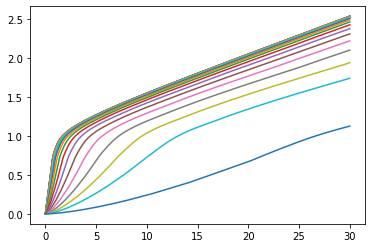

In [5]:
# Plot the consumption function
M = np.linspace(0, 30, 300)
pLvl = 1.0
P = pLvl * np.ones_like(M)
for j in range(MedicalExample.MedShkDstn[0][0].size):
    MedShk = MedicalExample.MedShkDstn[0][1][j] * np.ones_like(M)
    M_temp = M + MedicalExample.solution[0].mLvlMin(pLvl)
    C = MedicalExample.solution[0].cFunc(M_temp, P, MedShk)
    plt.plot(M_temp, C)
print("Consumption function by medical need shock (constant permanent income)")
plt.show()

Medical care function by medical need shock (constant permanent income)


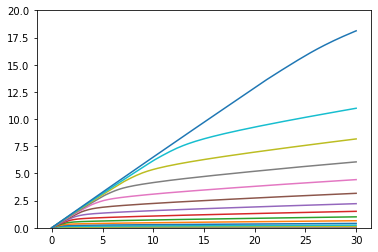

In [6]:
# Plot the medical care function
for j in range(MedicalExample.MedShkDstn[0][0].size):
    MedShk = MedicalExample.MedShkDstn[0][1][j] * np.ones_like(M)
    Med = MedicalExample.solution[0].MedFunc(M_temp, P, MedShk)
    plt.plot(M_temp, Med)
print("Medical care function by medical need shock (constant permanent income)")
plt.ylim([0, 20])
plt.show()

End of period savings by medical need shock (constant permanent income)


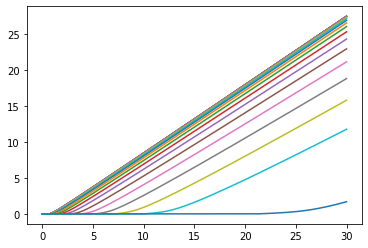

In [7]:
# Plot the savings function
for j in range(MedicalExample.MedShkDstn[0][0].size):
    MedShk = MedicalExample.MedShkDstn[0][1][j] * np.ones_like(M)
    Sav = (
        M_temp
        - MedicalExample.solution[0].cFunc(M_temp, P, MedShk)
        - MedicalExample.MedPrice[0]
        * MedicalExample.solution[0].MedFunc(M_temp, P, MedShk)
    )
    plt.plot(M_temp, Sav)
print("End of period savings by medical need shock (constant permanent income)")
plt.show()

/Users/ms/dev/HARK/HARK/utilities.py:160: RuntimeWarning: divide by zero encountered in power
  return( c**-gam )


Marginal value function (pseudo inverse)


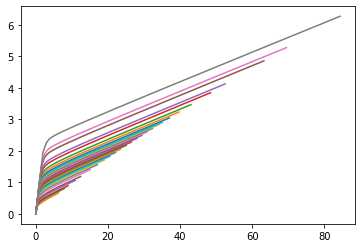

In [8]:
# Plot the marginal value function
M = np.linspace(0.0, 30, 300)
for p in range(MedicalExample.pLvlGrid[0].size):
    pLvl = MedicalExample.pLvlGrid[0][p]
    M_temp = pLvl * M + MedicalExample.solution[0].mLvlMin(pLvl)
    P = pLvl * np.ones_like(M)
    vP = MedicalExample.solution[0].vPfunc(M_temp, P) ** (-1.0 / MedicalExample.CRRA)
    plt.plot(M_temp, vP)
print("Marginal value function (pseudo inverse)")
plt.show()

In [9]:
if MedicalExample.vFuncBool:
    # Plot the value function
    M = np.linspace(0.0, 1, 300)
    for p in range(MedicalExample.pLvlGrid[0].size):
        pLvl = MedicalExample.pLvlGrid[0][p]
        M_temp = pLvl * M + MedicalExample.solution[0].mLvlMin(pLvl)
        P = pLvl * np.ones_like(M)
        v = CRRAutility_inv(
            MedicalExample.solution[0].vFunc(M_temp, P), gam=MedicalExample.CRRA
        )
        plt.plot(M_temp, v)
    print("Value function (pseudo inverse)")
    plt.show()

In [10]:
if do_simulation:
    t_start = time()
    MedicalExample.T_sim = 100
    MedicalExample.track_vars = ["mLvlNow", "cLvlNow", "MedNow"]
    MedicalExample.makeShockHistory()
    MedicalExample.initializeSim()
    MedicalExample.simulate()
    t_end = time()
    print(
        "Simulating "
        + str(MedicalExample.AgentCount)
        + " agents for "
        + str(MedicalExample.T_sim)
        + " periods took "
        + mystr(t_end - t_start)
        + " seconds."
    )

Simulating 10000 agents for 100 periods took 36.5912 seconds.
